# Solar energy

### Choosing stations

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "../../../datasets/_classified/kaggle/"

In [3]:
df_solar_co = pd.read_csv(path + "solar_generation_by_country.csv")
df_solar_co.head(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_solar_st = pd.read_csv(path + "solar_generation_by_station.csv")
df_solar_st.tail(2)

,time_step,AT11,AT21,AT12,AT31,AT32,AT22,AT33,AT34,AT13,BE21,BE31,BE32,BE33,BE22,BE34,BE35,BE23,BE10,BE24,BE25,BG32,BG33,BG31,BG34,BG41,BG42,CZ06,CZ03,CZ08,CZ01,CZ05,CZ04,CZ02,CZ07,DEA5,DE30,DE40,DE91,DE50,DED1,DE71,DEE1,DEA4,DED2,DEA1,DE13,DE72,DEE2,DE60,DE92,DE12,DE73,DEB1,DEA2,DED3,DE93,DEE3,DE80,DE25,DEA3,DE22,DE21,DE24,DE23,DEB3,DEF0,DE27,DE11,DEG0,DEB2,DE14,DE26,DE94,ES61,ES24,ES12,ES13,ES41,ES42,ES51,ES30,ES52,ES43,ES11,ES53,ES23,ES22,ES21,ES62,FI20,FI1C,FI1D,FI1B,FI19,FR42,FR61,FR72,FR25,FR26,FR52,FR24,FR21,FR83,FR43,FR23,FR10,FR81,FR63,FR41,FR62,FR30,FR51,FR22,FR53,FR82,FR71,EL51,EL30,EL63,EL53,EL62,EL54,EL52,EL43,EL42,EL65,EL64,EL61,EL41,HU33,HU23,HU32,HU31,HU21,HU10,HU22,CH02,CH03,CH05,CH01,CH07,CH06,CH04,IE01,IE02,ITF1,ITF5,ITF6,ITF3,ITH5,ITH4,ITI4,ITC3,ITC4,ITI3,ITF2,ITC1,ITF4,ITG2,ITG1,ITI1,ITH2,ITI2,ITC2,ITH3,NL13,NL23,NL12,NL22,NL11,NL42,NL41,NL32,NL21,NL31,NL34,NL33,NO04,NO02,NO01,NO03,NO05,PL51,PL61,PL31,PL43,PL11,PL21,PL12,PL52,PL32,PL34,PL63,PL22,PL33,PL62,PL41,PL42,PT18,PT15,PT16,PT17,PT11,RO32,RO12,RO21,RO11,RO31,RO22,RO41,RO42,SE32,SE31,SE12,SE33,SE21,SE11,SE22,SE23,SK01,SK03,SK04,SK02,UKH2,UKJ1,UKD6,UKK3,UKD1,UKF1,UKK4,UKK2,UKH1,UKE1,UKL2,UKM2,UKH3,UKK1,UKD3,UKJ3,UKG1,UKM6,UKI3UKI4,UKJ4,UKD4,UKF2,UKF3,UKD7,UKM5,UKE2,UKN0,UKC2,UKI5UKI6,UKG2,UKM3,UKE3,UKJ2,UKC1,UKG3,UKL1,UKE4
262966,262967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262967,262968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def add_time(_df):
    "Returns a DF with two new cols : the time and hour of the day"
    t = pd.date_range(start='1/1/1986', periods=df_solar_co.shape[0], freq = 'H')
    t = pd.DataFrame(t)
    _df = pd.concat([_df, t], axis=1)
    _df.rename(columns={ _df.columns[-1]: "time" }, inplace = True)
    _df['hour'] = _df['time'].dt.hour
    _df['month'] = _df['time'].dt.month
    _df['week'] = _df['time'].dt.week
    return _df

In [6]:
df_solar_co, df_solar_st = add_time(df_solar_co), add_time(df_solar_st)
df_solar_co.tail(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK,time,hour,month,week
262966,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 22:00:00,22,12,53
262967,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 23:00:00,23,12,53


In [7]:
def plot_hourly(df, title):
    plt.figure(figsize=(10, 7))
    for c in df.columns:
        if c != 'hour':
            sns.lineplot(x="hour", y=c, data=df, label=c)
            #plt.legend(c)
    plt.title(title)
    plt.show()

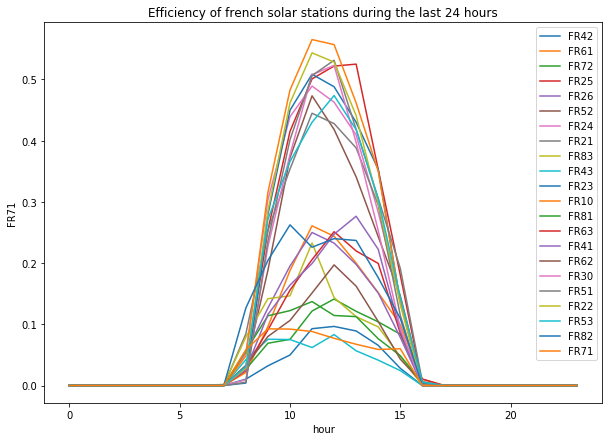

In [8]:
col_fr = [c for c in df_solar_st.columns if 'FR' in c]
col_fr.append('hour')

temp_df = df_solar_st[col_fr]
plot_hourly(temp_df[-24:], "Efficiency of french solar stations during the last 24 hours")

Text(0.5, 1.0, 'efficiency for french stations')

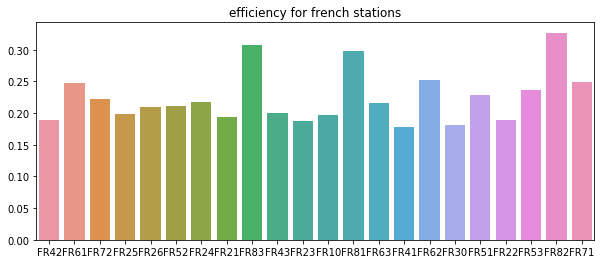

In [9]:
_df = temp_df.drop(columns=['hour']).describe().iloc[6, :]
plt.figure(figsize=(10, 4))
sns.barplot(x=_df.index, y=_df.values)
plt.title("efficiency for french stations")

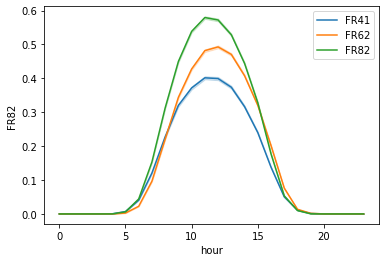

In [10]:
for c in ['FR41', 'FR62', 'FR82']:
    sns.lineplot(x="hour", y=c, data=temp_df, label=c)

In [11]:
#sns.pairplot(temp_df[['FR41', 'FR62', 'FR82']])

## Feature Selection

In [19]:
X = df_solar_st[-24*365:]
X

,time_step,AT11,AT21,AT12,AT31,AT32,AT22,AT33,AT34,AT13,BE21,BE31,BE32,BE33,BE22,BE34,BE35,BE23,BE10,BE24,BE25,BG32,BG33,BG31,BG34,BG41,BG42,CZ06,CZ03,CZ08,CZ01,CZ05,CZ04,CZ02,CZ07,DEA5,DE30,DE40,DE91,DE50,DED1,DE71,DEE1,DEA4,DED2,DEA1,DE13,DE72,DEE2,DE60,DE92,DE12,DE73,DEB1,DEA2,DED3,DE93,DEE3,DE80,DE25,DEA3,DE22,DE21,DE24,DE23,DEB3,DEF0,DE27,DE11,DEG0,DEB2,DE14,DE26,DE94,ES61,ES24,ES12,ES13,ES41,ES42,ES51,ES30,ES52,ES43,ES11,ES53,ES23,ES22,ES21,ES62,FI20,FI1C,FI1D,FI1B,FI19,FR42,FR61,FR72,FR25,FR26,FR52,FR24,FR21,FR83,FR43,FR23,FR10,FR81,FR63,FR41,FR62,FR30,FR51,FR22,FR53,FR82,FR71,EL51,EL30,EL63,EL53,EL62,EL54,EL52,EL43,EL42,EL65,EL64,EL61,EL41,HU33,HU23,HU32,HU31,HU21,HU10,HU22,CH02,CH03,CH05,CH01,CH07,CH06,CH04,IE01,IE02,ITF1,ITF5,ITF6,ITF3,ITH5,ITH4,ITI4,ITC3,ITC4,ITI3,ITF2,ITC1,ITF4,ITG2,ITG1,ITI1,ITH2,ITI2,ITC2,ITH3,NL13,NL23,NL12,NL22,NL11,NL42,NL41,NL32,NL21,NL31,NL34,NL33,NO04,NO02,NO01,NO03,NO05,PL51,PL61,PL31,PL43,PL11,PL21,PL12,PL52,PL32,PL34,PL63,PL22,PL33,PL62,PL41,PL42,PT18,PT15,PT16,PT17,PT11,RO32,RO12,RO21,RO11,RO31,RO22,RO41,RO42,SE32,SE31,SE12,SE33,SE21,SE11,SE22,SE23,SK01,SK03,SK04,SK02,UKH2,UKJ1,UKD6,UKK3,UKD1,UKF1,UKK4,UKK2,UKH1,UKE1,UKL2,UKM2,UKH3,UKK1,UKD3,UKJ3,UKG1,UKM6,UKI3UKI4,UKJ4,UKD4,UKF2,UKF3,UKD7,UKM5,UKE2,UKN0,UKC2,UKI5UKI6,UKG2,UKM3,UKE3,UKJ2,UKC1,UKG3,UKL1,UKE4,time,hour,month,week
254208,254209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01 00:00:00,0,1,1
254209,254210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01 01:00:00,1,1,1
254210,254211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Model Training

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [ ]:
#from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
import xgboost as xgb
import lightgbm as lgbm

In [ ]:
# list of all the basic models used at first
model_list = [
    LinearRegression(), Lasso(), Ridge(), ElasticNet(),
    RandomForestRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(),
    xgb.XGBRegressor(), lgbm.LGBMRegressor()
             ]

# creation of list of names and scores for the train / test
model_names = [str(m)[:str(m).index('(')] for m in model_list]
rmse_train, rmse_test = [], []

# fit and predict all models
for model, name in zip(model_list, model_names):
    model.fit(X_train, y_train)
    sc_train, sc_test = get_rmse(model, name)
    rmse_train.append(sc_train)
    rmse_test.append(sc_test)